<a href="https://colab.research.google.com/github/syahla31/PCVK_Ganjil_2023/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Laporan Praktikum Pertemuan 10 - Pengolahan Citra dan Visi Komputer**
---
Nama: Syahla' Syafiqah Fayra

NIM: 2141720015

### TUGAS PRAKTIKUM
---

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week10.ipynb”.

  Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [ ]:
!pip install pytesseract

In [ ]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
bawah.

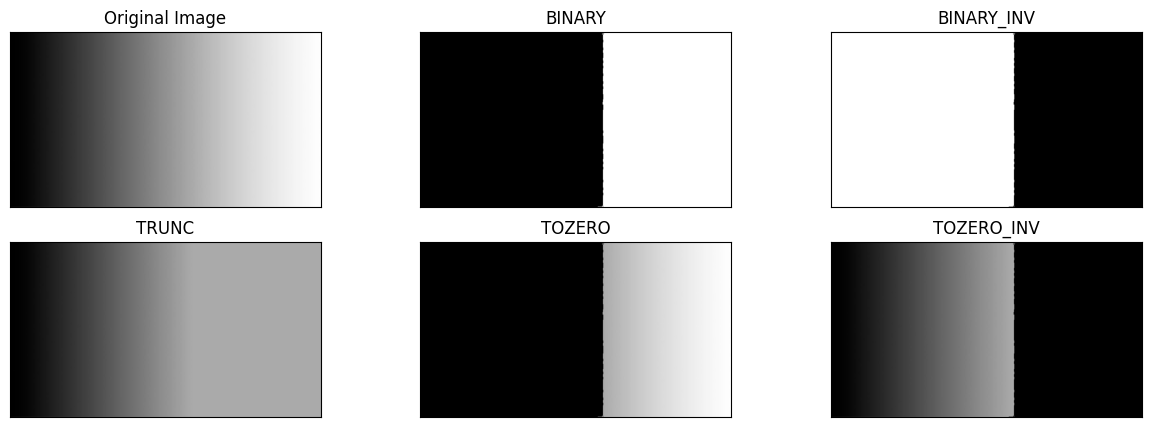

In [ ]:
filename_1 = ('/content/drive/MyDrive/Images/gradient.jpg')

# menggunakan library
img_g = cv2.imread(filename_1)
ret,thresh1 = cv2.threshold(img_g,170,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img_g,170,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img_g,170,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img_g,170,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img_g,170,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img_g, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

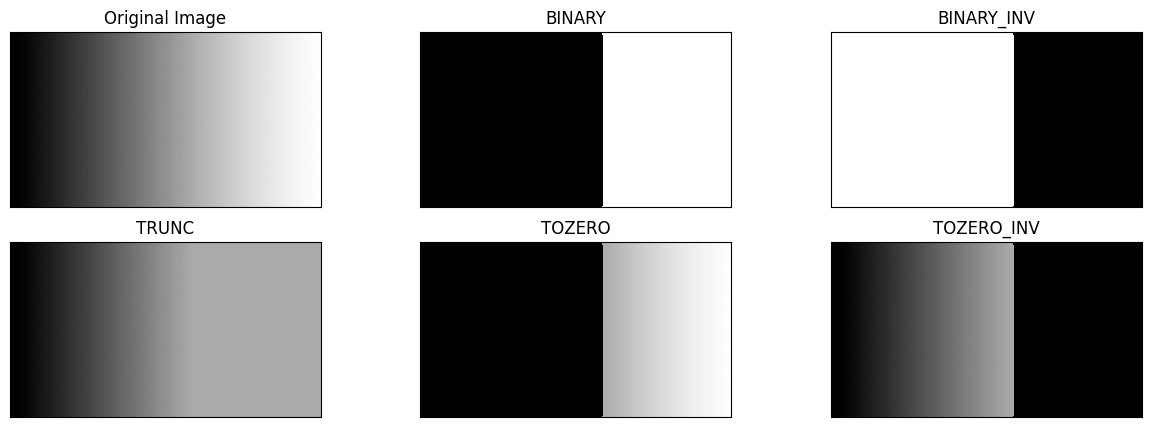

In [ ]:
# tanpa menggunakan library
img_g = cv2.imread(filename_1, 0)
thresh1 = cv2.imread(filename_1)
thresh2 = cv2.imread(filename_1)
thresh3 = cv2.imread(filename_1)
thresh4 = cv2.imread(filename_1)
thresh5 = cv2.imread(filename_1)
thresh = 170    #nilai Threshold yang ditentukan

#1. Original Image
thresh1[img_g>thresh] = 255
thresh1[img_g<=thresh] = 0
#2. Binary threshold inverse
thresh2 = 255 - thresh1
#3. Threshold Truncate
thresh3[img_g>thresh] = thresh
#4. Threshold Tozero
thresh4[img_g<=thresh] = 0
#5. Threshold Tozero Inverse
thresh5[img_g>thresh] = 0

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img_g, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()

4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

<ipython-input-10-70d13d05892e>:28: RuntimeWarning: invalid value encountered in divide
  mb = sumb / wb


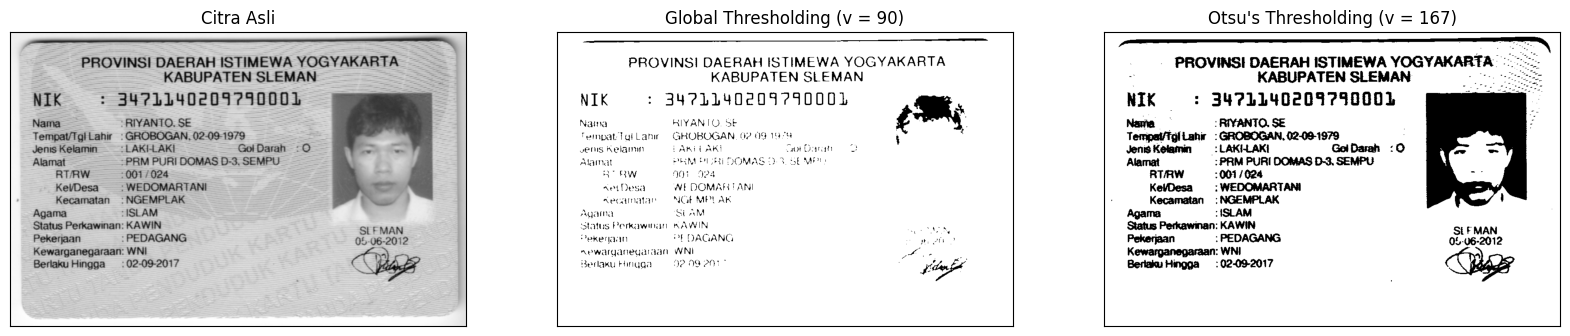

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
filename_1 = '/content/drive/MyDrive/Images/KTP_More/ktp8.png'
img_lgs = cv2.imread(filename_1, 0)

# Apply Gaussian Blur
blur = cv2.GaussianBlur(img_lgs, (5, 5), 0)

# Calculate the histogram
hist = cv2.calcHist([blur], [0], None, [256], [0, 256])

hist_norm = hist.ravel() / hist.max()
Q = hist_norm.cumsum()
bins = np.arange(256)
wb = 0
sumb = 0
varmax = 0
fn_min = np.inf
thresh = -1

for i in range(0, 255):
    wb += hist[i]
    wf = (img_lgs.shape[0] * img_lgs.shape[1]) - wb
    sumb += (i * hist[i])
    mb = sumb / wb
    mf = (sumb - sumb) / wf
    betweenvar = wb * wf * (mb - mf) * (mb - mf)

    if (betweenvar > varmax):
        varmax = betweenvar
        thresh = i

# Change the threshold value to 167
thresh = 167

x = "Otsu's Thresholding (v = " + str(thresh) + ")"
ret, th1 = cv2.threshold(blur, 90, 255, cv2.THRESH_BINARY)
ret, th2 = cv2.threshold(blur, thresh, 255, cv2.THRESH_BINARY)

titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, th2]
plt.figure(figsize=(20, 15))

for i in range(len(citra3)):
    plt.subplot(1, 3, i + 1)
    plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images.
Petunjuk:

  A. Anda dapat gunakan cv.calcHist untuk menampilkan histogram.
  
  B. Buka link berikut https://opencv.tutorial.readthedocs.io/en/latest/histogram/histogram.html
  
  C. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter yaitu mask. Jika diset None, maka keseluruhan image akan dihitung histogramnya. Jika kita tentukan mask, maka hanya bagian image yang dimasking warna putih yang akan dihitung histogramnya (dari contoh dibawah dinamakan dengan Citra Segment).






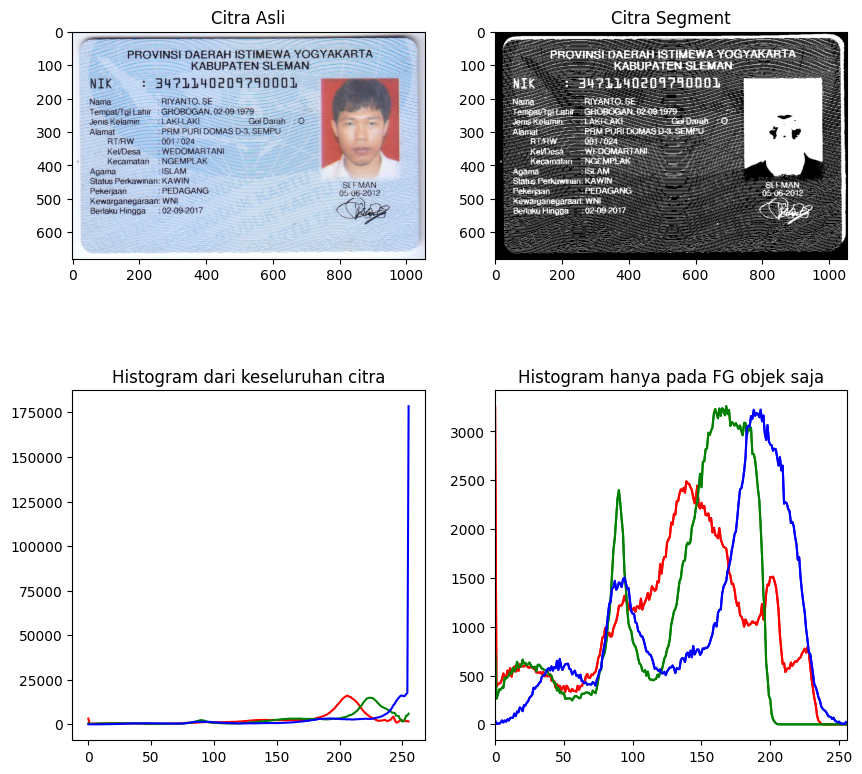

In [ ]:
# No 5
filename_3 = ('/content/drive/MyDrive/Images/KTP_More/ktp8.png')
img_l = cv2.imread(filename_3)
img_rgb = cv2.cvtColor(img_l,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv2.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])

plt.show()

6. Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warna
yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

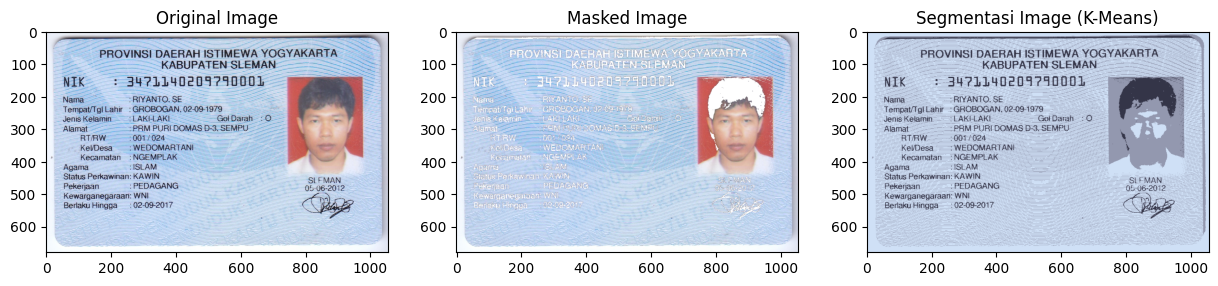

In [ ]:
from sklearn.cluster import KMeans

# Load the image
filename = '/content/drive/MyDrive/Images/KTP_More/ktp8.png'
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Flatten the pixel values
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define the criteria and the number of clusters (k)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3# Number of clusters

# Apply K-Means clustering
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers to integers
centers = np.uint8(centers)

# Flatten the labels array
labels = labels.flatten()

# Create a masked image by turning one cluster into white
masked_image = np.copy(img)
masked_image = masked_image.reshape((-1, 3))
cluster_to_white = 1
masked_image[labels == cluster_to_white] = [255, 255, 255]
masked_image = masked_image.reshape(img.shape)

# Convert the segmented image back to the original shape
segmented_image = centers[labels].reshape(img.shape)

# Display the original image, segmented image, and masked image
plt.figure(figsize=(15, 8))
plt.subplot(1, 3, 1), plt.imshow(img)
plt.title('Original Image')

plt.subplot(1, 3, 2), plt.imshow(masked_image)
plt.title('Masked Image')

plt.subplot(1, 3, 3), plt.imshow(segmented_image)
plt.title('Segmentasi Image (K-Means)')

plt.show()

### Konversi gambar KTP menjadi teks
---
Berikut adalah proses konversi gambar KTP menjadi teks yang dapat mengenali tulisan.



1. Install PIP OCR

In [ ]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 19 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 1s (5,956 kB/s)
debconf: unable to ini

2. Menambahkan axis kedalam objek figure dengan method add_subplot(). kemudian kita
tunjukan objek figure kita dengan method show()

In [ ]:
def display(img,cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

3. Python-tesseract akan mencetak teks yang dikenali dan menyimpannya kedalam file

In [ ]:
from pytesseract import Output
img = cv2.imread('/content/drive/MyDrive/Images/KTP_More/ktp8.png')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


4. Menambahkan kotak untuk deteksi teksi pada gambar

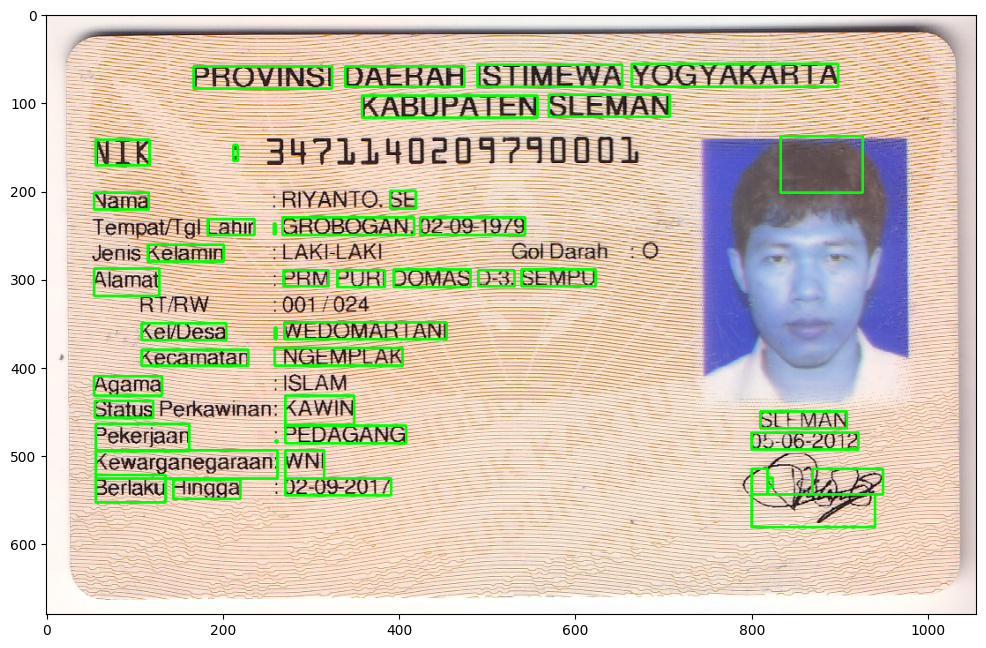

In [ ]:
n_boxes = len(text1['text'])
for i in range(n_boxes):
  if int(text1['conf'][i]) > 60:
     (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
     img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
display(img)

5. Hasil pembacaan KTP Menjadi text

em

PROVINSI DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN

 

NIK : 34711140209790001

Nama :RIYANTO. SE

Tempat/Tgl Lahir : GROBOGAN. 02-09-1979

Jenis Kelamin : LAKI-LAKI Gol Darah : 0

Alamat PRM PURI DOMAS D-3. SEMPU
RTRW 1001 1024

Kel/Desa : WEDOMARTANI!
Kecamatan : NGEMPLAK

Agama "ISLAM
Status Bean KAWIN SLEMAN
Pekerjaan : PEDAGANG 05-06-2012

Kewarganegaraan: WNI HI —
Berlaku Hingga :02-09-2017 NIA

   
 

 



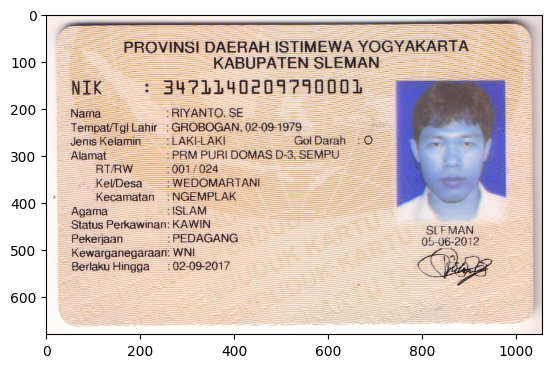

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Images/KTP_More/ktp8.png")
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()

### TUGAS
---

mengimplementasikan hasil citra yang telah diproses dengan
GLOBAL THRESHOLDING dan hasilnya diproses untuk membaca teks yang terdapat
pada KTP.



 

   

KN YAKAKRLA

PROVINSI DAERAH SIMEWA

KABUPATEN SLEMAN
NIK : 34711402097190001 :
Nama : RIYANTO.

Tempdt/TgfLahir - GROBOGAN.
ol Darah :D

eni Kelamirg : LAKI-LAKI
EEM PURI DOMAS D-3. SEMPU
1001 1024
1WEDOMARTANI
Kecamatan : NGEMPLAK
Agama "ISLAM
Siar - Bea SLEMAN
02-06-2012

Bad 3
peta (3 2

 



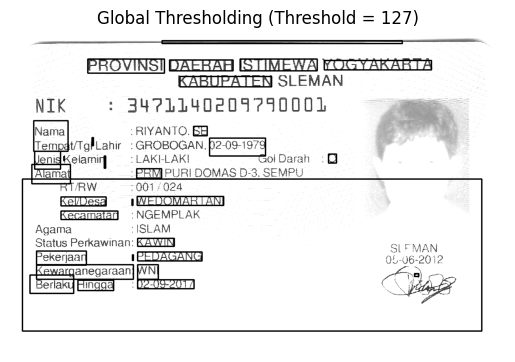

In [ ]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

img = cv2.imread("/content/drive/MyDrive/Images/KTP_More/ktp8.png")
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)

n_boxes = len(text1['text'])
for i in range(n_boxes):
  if int(text1['conf'][i]) > 60:
     (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
     threshed = cv2.rectangle(threshed, (x, y), (x + w, y + h), (0, 255, 0), 2)

text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()

plt.imshow(threshed, cmap='gray')
plt.title('Global Thresholding (Threshold = ' + str(global_thresh_value) + ')')
plt.axis('off')
plt.show()